In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense
from tensorflow.keras.optimizers import Adam

# Load the data from CSV file
data = pd.read_csv(r"C:\Users\janak\ConvLSTM\Daily_HAI_Mean.csv")

# Preprocess the data
# Assuming you have latitude, longitude, and activity_index columns
# Convert date to datetime format
data['date'] = pd.to_datetime(data['ds'])
# Normalize latitude and longitude
data['latitude'] = (data['Lat'] - data['Lat'].min()) / (data['Lat'].max() - data['Lat'].min())
data['longitude'] = (data['Lon'] - data['Lon'].min()) / (data['Lon'].max() - data['Lon'].min())
data['activity_index'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())

# Define parameters
seq_length = 7  # Length of sequence for each sample
n_features = 3  # Number of features (latitude, longitude, activity_index)
n_filters = 32  # Number of filters in ConvLSTM layers
kernel_size = (1, 1)  # Kernel size for ConvLSTM layers (adjusted based on spatial dimensions)

# Prepare the data for ConvLSTM
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[['latitude', 'longitude', 'activity_index']].iloc[i:i+seq_length].values)
    y.append(data['activity_index'].iloc[i+seq_length])
X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for ConvLSTM
X_train = X_train.reshape(-1, seq_length, 1, n_features, 1)
X_test = X_test.reshape(-1, seq_length, 1, n_features, 1)

# Build the ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=n_filters, kernel_size=kernel_size, activation='relu', input_shape=(seq_length, 1, n_features, 1)),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


Epoch 1/50
9/9 [==============================] - 2s 40ms/step - loss: 0.1676 - val_loss: 0.1694
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.1251 - val_loss: 0.1199
Epoch 3/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0790 - val_loss: 0.0717
Epoch 4/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0439 - val_loss: 0.0430
Epoch 5/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0377 - val_loss: 0.0426
Epoch 6/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0370 - val_loss: 0.0418
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0350 - val_loss: 0.0433
Epoch 8/50
9/9 [==============================] - 0s 7ms/step - loss: 0.0343 - val_loss: 0.0422
Epoch 9/50
9/9 [==============================] - 0s 6ms/step - loss: 0.0345 - val_loss: 0.0403
Epoch 10/50
9/9 [==============================] - 0s 8ms/step - loss: 0.0339 - val_loss: 0.0401
Epoch 11/50
9/9 [=====================

3/3 [==============================] - 0s 5ms/step


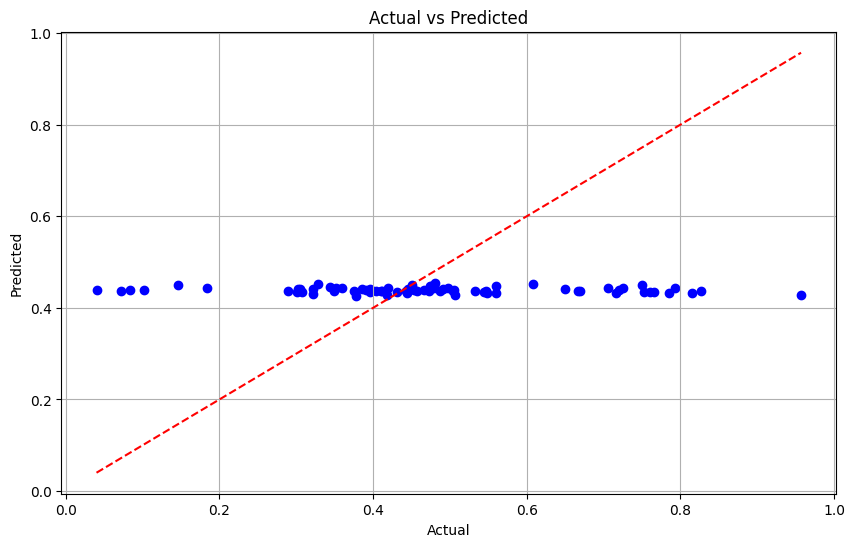

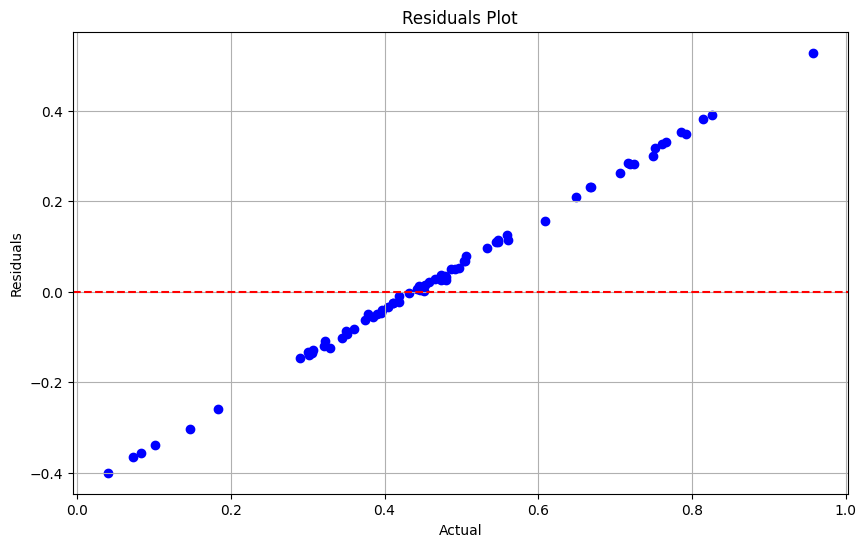

Mean Squared Error: 0.03747478584883179
R-squared: -0.04920416846009279


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# Assuming you already have the model trained and the test data prepared
# model = trained model
# X_test = test features
# y_test = actual test labels

# Make predictions
y_pred = model.predict(X_test)

# Reshape predictions and actual labels
y_pred = y_pred.reshape(-1)
y_test = y_test.reshape(-1)

# Ensure both have the same number of samples
min_samples = min(len(y_test), len(y_pred))
y_test = y_test[:min_samples]
y_pred = y_pred[:min_samples]

# Compute evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.grid(True)
plt.show()

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)


In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, Dense
from tensorflow.keras.optimizers import Adam

In [4]:
# Load the data from CSV file
data = pd.read_csv(r"C:\Users\janak\ConvLSTM\Daily_HAI_Mean.csv")

In [5]:
data.head()

,ds,Lat,Lon,y,unique_id
0,2020-01-01,51.728440,7.333657,0.117984,1
1,2020-01-02,51.745312,7.324808,0.128913,1
2,2020-01-03,51.736941,7.322903,0.123177,1
3,2020-01-04,51.736578,7.307931,0.125445,1
4,2020-01-05,51.744239,7.330141,0.113853,1


In [10]:
# Preprocess the data
# Assuming you have latitude, longitude, and activity_index columns
# Convert date to datetime format
data['date'] = pd.to_datetime(data['ds'])
# Normalize latitude and longitude
data['latitude'] = (data['Lat'] - data['Lat'].min()) / (data['Lat'].max() - data['Lat'].min())
data['longitude'] = (data['Lon'] - data['Lon'].min()) / (data['Lon'].max() - data['Lon'].min())
data['activity_index'] = (data['y'] - data['y'].min()) / (data['y'].max() - data['y'].min())



In [11]:
data.head()

,ds,Lat,Lon,y,unique_id,date,latitude,longitude,activity_index
0,2020-01-01,51.728440,7.333657,0.117984,1,2020-01-01,0.399589,0.344182,0.605971
1,2020-01-02,51.745312,7.324808,0.128913,1,2020-01-02,0.612946,0.244590,0.924800
2,2020-01-03,51.736941,7.322903,0.123177,1,2020-01-03,0.507084,0.223151,0.757461
3,2020-01-04,51.736578,7.307931,0.125445,1,2020-01-04,0.502494,0.054646,0.823631
4,2020-01-05,51.744239,7.330141,0.113853,1,2020-01-05,0.599377,0.304618,0.485474


In [9]:
data['y'].min(), data['y'].max()

(0.0972100438685852, 0.1314913564989662)

In [13]:

# Define parameters
seq_length = 7  # Length of sequence for each sample
n_features = 3  # Number of features (latitude, longitude, activity_index)
n_filters = 32  # Number of filters in ConvLSTM layers
kernel_size = (3, 3)  # Kernel size for ConvLSTM layers

# Prepare the data for ConvLSTM
X = []
y = []
for i in range(len(data) - seq_length):
    X.append(data[['latitude', 'longitude', 'activity_index']].iloc[i:i+seq_length].values)
    y.append(data['activity_index'].iloc[i+seq_length])
X = np.array(X)
y = np.array(y)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for ConvLSTM
X_train = X_train.reshape(-1, seq_length, 1, n_features, 1)
X_test = X_test.reshape(-1, seq_length, 1, n_features, 1)



In [16]:
# Build the ConvLSTM model
model = Sequential([
    ConvLSTM2D(filters=n_filters, kernel_size=kernel_size, activation='relu', input_shape=(seq_length, 1, n_features, 1)),
    Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer=Adam(), loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)


ValueError: Exception encountered when calling layer "conv_lstm2d_2" (type ConvLSTM2D).

Negative dimension size caused by subtracting 3 from 1 for '{{node conv_lstm2d_2/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](conv_lstm2d_2/Sum, conv_lstm2d_2/zeros)' with input shapes: [?,1,3,1], [3,3,1,32].

Call arguments received by layer "conv_lstm2d_2" (type ConvLSTM2D):
  • inputs=tf.Tensor(shape=(None, 7, 1, 3, 1), dtype=float32)
  • mask=None
  • training=None
  • initial_state=None

In [17]:
X_train.shape

(287, 7, 1, 3, 1)